### Группировка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
%matplotlib inline
pd.options.display.max_columns = 50

In [2]:
%%time
flights = pd.read_csv('v3/dep_delay_df.csv')
flights.drop(['YEAR','FLIGHTS', 'DEP_DELAY_GROUP'], axis=1, inplace=True)
#flights.FIRST_DEP_TIME.fillna(0, inplace=True)
#flights.TOTAL_ADD_GTIME.fillna(0, inplace=True)
#df.LONGEST_ADD_GTIME.fillna(0, inplace=True)
flights.drop('LONGEST_ADD_GTIME', axis=1, inplace=True)
flights.drop('TOTAL_ADD_GTIME', axis=1, inplace=True)
flights.drop('FIRST_DEP_TIME', axis=1, inplace=True)
flights.STD_DELAY.fillna(0, inplace=True)
flights.MEAN_DELAY.fillna(0, inplace=True)
flights.MAX_DELAY.fillna(0, inplace=True)
flights.MIN_DELAY.fillna(0, inplace=True)
flights.COUNT.fillna(0, inplace=True)
flights['25%_DELAY'].fillna(0, inplace=True)
flights['50%_DELAY'].fillna(0, inplace=True)
flights['75%_DELAY'].fillna(0, inplace=True)
flights.dropna(inplace=True)

CPU times: user 36.2 s, sys: 13.2 s, total: 49.4 s
Wall time: 52.9 s


In [3]:
flights.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUM,FLIGHT_MUNBER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,DISTANCE,FIRST_DEP_TIME,TOTAL_ADD_GTIME,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,tempC,windspeedKmph,winddirDegree,...,visibility,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,weatherCode_dest,COUNT,MEAN_DELAY,STD_DELAY,MIN_DELAY,25%_DELAY,50%_DELAY,75%_DELAY,MAX_DELAY,WEEKEND,LATE_AIRLINE_INDEX,LATE_TAIL_INDEX,LATE_ARR,LATE_DEP_1,LATE_DEP_2,LATE_DEP_3,LATE_DEP_4
0,4,23,4,301074,835359,165,445799,657930,322928,566394,1210,-8.0,1414,1440.0,0.0,0.0,8,3,0.0,13.8,3,29,8,12,324,...,10,1018,23,8,-1,5,17,5,200.0,10.0,-1.600000,8.408990,-11.0,-5.5,-3.0,-0.50,20.0,0,0.239771,0.233333,0.0,0.0,0.0,0.0,0.0
1,4,24,5,301074,835937,165,445799,657930,322928,566394,1210,4.0,1414,1440.0,0.0,0.0,11,3,0.0,12.2,3,36,11,13,90,...,10,1017,46,11,-1,10,22,10,176.0,19.0,22.157895,49.944706,-9.0,-3.0,-1.0,12.00,140.0,0,0.239771,0.270298,0.0,1.0,1.0,0.0,0.0
2,4,25,6,301074,955291,165,445799,657930,322928,566394,1210,44.0,1414,1440.0,0.0,0.0,7,4,0.0,9.8,2,44,5,14,60,...,10,1009,100,5,4,2,22,2,113.0,11.0,1.636364,16.698938,-7.0,-5.5,-4.0,-0.50,51.0,1,0.239771,0.257855,0.0,0.0,1.0,0.0,0.0
3,4,26,7,301074,370347,165,445799,657930,322928,566394,1210,-5.0,1414,1440.0,0.0,0.0,8,3,0.0,13.9,3,52,8,17,15,...,10,1017,3,8,2,6,23,6,116.0,22.0,17.272727,37.386249,-8.0,-4.0,-1.5,15.50,128.0,1,0.239771,0.269641,0.0,0.0,1.0,1.0,0.0
4,4,27,1,301074,131703,165,445799,657930,322928,566394,1210,9.0,1414,1440.0,0.0,0.0,7,3,0.0,13.9,3,59,7,27,13,...,10,1021,14,7,3,3,39,3,113.0,18.0,8.333333,26.648033,-6.0,-4.0,-2.5,2.25,94.0,0,0.239771,0.229491,1.0,1.0,1.0,0.0,0.0


Поскольку данных слишком много, логичнее было бы разбить их на несколько групп, чтобы проверить качество моделей на отдельных участках. Так мы можем обнаружить более сложные участки

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [8]:
scaler = StandardScaler()

In [9]:
def create_data():
    a = dict()
    a["method"] = np.nan
    data = pd.DataFrame(a, index=[0])
    return data

In [56]:
def threshhold(x):
    if x > 0.5:
        return 1
    return 0

In [31]:
def train_model(df, model, target):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)
    #if(str(model).split('(')[0] == "LinearRegression"):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    if str(model).split('.')[0] == '<tensorflow':
        model.fit(X_train, y_train, epochs=3, verbose=True, batch_size=128)
        prediction = model.predict(X_test)
        test_score = []
        for i in range(len(y_test)):
            test_score.append(threshhold(prediction[i]))
        return f1_score(y_test, test_score)
    else:
        model.fit(X_train, y_train)
    return f1_score(y_test, model.predict(X_test))

In [44]:
def get_feature(df, model, target):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    if(str(model).split('(')[0] == "LogisticRegression") | (str(model).split('(')[0] == "LinearSVC"):
        return model.coef_[0]
    else:
        return model.feature_importances_

In [12]:
def create_F1(df, grouped_by, model, target):
    data = create_data()
    data["method"] = str(model).split('(')[0]
    if str(model).split('.')[0] == '<tensorflow':
        data["method"] = "Network"
    for col in df[grouped_by].value_counts().sort_index().index:
        dff = df[df[grouped_by] == col].copy()
        dff.drop(grouped_by, axis=1, inplace=True)
        tmp = pd.DataFrame({col: [train_model(dff, model, target)]})
        #print(tmp)
        data = pd.concat([data, tmp], axis=1)
    return data

In [13]:
def create_feature(df, grouped_by, model, target, fit=True):
    data = pd.DataFrame({"features": df.drop([target, grouped_by], axis=1).columns})
    for col in df[grouped_by].value_counts().sort_index().index:
        dff = df[df[grouped_by] == col].copy()
        dff.drop(grouped_by, axis=1, inplace=True)
        tmp = pd.DataFrame({col: get_feature(dff, model, target)})
        data = pd.concat([data, tmp], axis=1)
    return data

In [14]:
def count_sample(df, grouped_by):
    data = create_data()
    data["method"] = "counts"
    for col in df[grouped_by].value_counts().sort_index().index:
        dff = df[df[grouped_by] == col].copy()
        dff.drop(grouped_by, axis=1, inplace=True)
        tmp = pd.DataFrame({col: [dff.shape[0]]})
        data = pd.concat([data, tmp], axis=1)
    return data

### Разбиение по MONTH

Прежде всего попробуем разбить данные на основе месяца вылета. Как было видно в начале исследования, количество рейсов заметно отличается от месяца

In [16]:
def fill_dep_delay(x):
    if x >= 15:
        return 1
    return 0

In [17]:
flights['DEP_DELAY'] = flights['DEP_DELAY'].apply(fill_dep_delay)

In [15]:
target = "DEP_DELAY"
grouped_by = "MONTH"

In [21]:
%%time
logit = LogisticRegression(max_iter=200)
tmp0 = create_F1(flights, grouped_by, logit, target)

CPU times: user 1min 11s, sys: 2.08 s, total: 1min 13s
Wall time: 1min 13s


In [14]:
%%time
lin_svc = LinearSVC()
tmp1 = create_MAE(flights, grouped_by, lin_svc, target)

CPU times: user 2min 27s, sys: 0 ns, total: 2min 27s
Wall time: 2min 27s


In [32]:
%%time
network = Sequential()
network.add(Dense(32, input_dim=51, kernel_initializer='he_normal', activation='relu'))
network.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#network.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
network.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

network.compile(optimizer="rmsprop", loss="binary_crossentropy")
tmp2 = create_F1(flights, grouped_by, network, target)

Epoch 1/3
2283/2283 [==============================] - 3s 1ms/step - loss: 0.3960
Epoch 2/3
2283/2283 [==============================] - 3s 1ms/step - loss: 0.3532
Epoch 3/3
2283/2283 [==============================] - 3s 1ms/step - loss: 0.3503
Epoch 1/3
2021/2021 [==============================] - 3s 1ms/step - loss: 0.3901
Epoch 2/3
2021/2021 [==============================] - 2s 1ms/step - loss: 0.3866
Epoch 3/3
2021/2021 [==============================] - 2s 1ms/step - loss: 0.3848
Epoch 1/3
2428/2428 [==============================] - 3s 1ms/step - loss: 0.3609
Epoch 2/3
2428/2428 [==============================] - 3s 1ms/step - loss: 0.3584
Epoch 3/3
2428/2428 [==============================] - 3s 1ms/step - loss: 0.3574
Epoch 1/3
2356/2356 [==============================] - 3s 1ms/step - loss: 0.3313
Epoch 2/3
2356/2356 [==============================] - 3s 1ms/step - loss: 0.3293
Epoch 3/3
2356/2356 [==============================] - 3s 1ms/step - loss: 0.3284
Epoch 1/3
2399/2

In [33]:
%%time
forest = RandomForestClassifier(n_estimators=40, verbose=True, random_state=42, n_jobs=6)
tmp3 = create_F1(flights, grouped_by, forest, target)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:   26.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:    0.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:   23.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:    0.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:   30.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:    0.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]

CPU times: user 29min 53s, sys: 11.5 s, total: 30min 5s
Wall time: 5min 41s


[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:    0.7s finished


In [37]:
%%time
grad = XGBClassifier(n_estimators=100, n_jobs=6, random_state=42, use_label_encoder=False)
tmp4 = create_F1(flights, grouped_by, grad, target)

/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:14:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:14:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 35min 7s, sys: 13.8 s, total: 35min 21s
Wall time: 6min 12s


Объединим получившиеся результаты в одну таблицу, где столбцами являются месяцы, а ячейками - средняя абсолютная ошибка на тестовой выборке. Цветом выделенно минимальное значение ошибки.

In [40]:
data1 = tmp0.append([tmp2, tmp3, tmp4])
data1.reset_index(inplace=True)
data1.drop("index", axis=1, inplace=True)
data1.style.highlight_max()
#ddf = pd.read_csv("mae_month.csv")
#ddf.style.highlight_min()

,method,1,2,3,4,5,6,7,8,9,10,11,12
0,LogisticRegression,0.541545,0.540274,0.520373,0.471546,0.518913,0.570944,0.563962,0.505664,0.371021,0.369884,0.462350,0.550996
1,Network,0.628275,0.620690,0.603220,0.581332,0.601788,0.637449,0.629423,0.600320,0.541320,0.527183,0.570641,0.628037
2,RandomForestClassifier,0.590791,0.582928,0.562469,0.529073,0.561530,0.603187,0.598500,0.557581,0.463153,0.453980,0.520770,0.596129
3,XGBClassifier,0.608500,0.606808,0.582194,0.550328,0.584298,0.621093,0.618627,0.578348,0.488258,0.478545,0.542540,0.616431


In [41]:
data1.to_csv("f1_month.csv", index=False)

Можем заметить, что случайный лес показывает достаточно неплохой результат по сравнению с конкурентами, однако его время обучения больше. Поэтому целесообразность его использования остаётся под вопросом. Градиентный бустинг показал лучший результат, поэтому в дальнейших сравнениях случайный лес использоваться не будет.

Посмотрим на количество данных:

In [42]:
count_sample(flights, "MONTH")

,method,1,2,3,4,5,6,7,8,9,10,11,12
0,counts,389514,344817,414310,402030,409318,412271,426413,416509,379928,395092,373040,375532


В среднем число рейсов составило от 40 до 53 тысяч. Существенного снижения средней абсолютной ошибки это не принесло, однако для некоторых месяцев MAE упала до 12.

Посмотрим на то, каким признакам алгоритмы отдают большее предпочтение. В силу сложности интерпретации нейронной сети в данный момент рассматривать её не будем.

In [45]:
create_feature(flights, "MONTH", logit, target).style.highlight_min(color='skyblue').highlight_max(color='salmon')

,features,1,2,3,4,5,6,7,8,9,10,11,12
0,DAY,-0.171195,0.056657,-0.050822,-0.092056,0.078420,0.053799,-0.001893,-0.109454,0.028950,-0.025114,-0.026411,0.150725
1,DAY_OF_WEEK,0.030116,-0.051371,0.059139,0.109032,-0.057962,-0.044774,-0.051594,0.002085,0.113294,0.171753,0.051598,-0.123868
2,AIRLINE,-0.071331,-0.009444,0.002713,0.012485,0.044844,0.057631,0.039475,0.011655,-0.048154,-0.012508,0.001036,0.040055
3,TAIL_NUM,-0.004613,-0.003569,0.014869,0.001785,-0.003946,0.003862,-0.002155,-0.007794,-0.000402,-0.007133,-0.007992,-0.007185
4,FLIGHT_MUNBER,0.039750,-0.001865,-0.044302,-0.039112,-0.009451,0.007260,-0.000903,-0.006404,-0.014772,-0.017296,-0.006728,-0.024093
5,ORIGIN,-0.031346,-0.027266,-0.033786,-0.031119,-0.021693,-0.006320,-0.009270,-0.034645,-0.041828,-0.026330,-0.029311,-0.019321
6,ORIGIN_CITY_NAME,0.038478,0.034845,0.024994,0.024319,0.023948,0.029688,0.034486,0.007919,0.004102,0.007773,0.049657,0.047720
7,DEST,-0.017966,0.006246,0.016374,0.006034,-0.011038,-0.007208,0.006928,-0.003095,0.009797,-0.021684,-0.007466,-0.011222
8,DEST_CITY_NAME,-0.014740,0.013639,0.032588,0.003569,-0.040600,0.021635,0.019370,0.001341,0.009357,-0.017922,0.033995,-0.009101
9,CRS_DEP_TIME,0.280627,0.275763,0.325970,0.304598,0.331570,0.436662,0.418384,0.360345,0.274740,0.262440,0.281172,0.274648


Алгоритмы линейной регрессии и метода опорных векторов руководствуются в большей степени одинаковыми признаками: DISTANCE и SCHEDULED_TIME. Этот подход схож с ввёденным бэйзлайном.

In [46]:
grad_feature_month = create_feature(flights, "MONTH", grad, target).round(3)
grad_feature_month.to_csv("grad_feture_month.csv", index=False)
grad_feature_month.style.highlight_max()

/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,features,1,2,3,4,5,6,7,8,9,10,11,12
0,DAY,0.026000,0.011000,0.015000,0.011000,0.009000,0.007000,0.008000,0.012000,0.009000,0.008000,0.010000,0.014000
1,DAY_OF_WEEK,0.006000,0.007000,0.007000,0.009000,0.007000,0.008000,0.007000,0.006000,0.007000,0.010000,0.007000,0.008000
2,AIRLINE,0.011000,0.009000,0.009000,0.011000,0.009000,0.010000,0.011000,0.008000,0.011000,0.009000,0.011000,0.013000
3,TAIL_NUM,0.003000,0.003000,0.003000,0.003000,0.003000,0.003000,0.003000,0.003000,0.004000,0.003000,0.003000,0.003000
4,FLIGHT_MUNBER,0.005000,0.005000,0.005000,0.005000,0.004000,0.004000,0.004000,0.004000,0.005000,0.005000,0.004000,0.004000
5,ORIGIN,0.005000,0.006000,0.006000,0.005000,0.004000,0.004000,0.004000,0.005000,0.006000,0.005000,0.006000,0.004000
6,ORIGIN_CITY_NAME,0.006000,0.006000,0.005000,0.005000,0.004000,0.004000,0.004000,0.004000,0.005000,0.005000,0.006000,0.004000
7,DEST,0.005000,0.005000,0.006000,0.005000,0.004000,0.004000,0.006000,0.006000,0.007000,0.007000,0.008000,0.005000
8,DEST_CITY_NAME,0.007000,0.008000,0.007000,0.007000,0.009000,0.005000,0.007000,0.006000,0.007000,0.007000,0.007000,0.008000
9,CRS_DEP_TIME,0.053000,0.053000,0.058000,0.051000,0.047000,0.070000,0.071000,0.052000,0.041000,0.037000,0.046000,0.045000


Градиентный бустинг не имеет явного фаворита

### Разбиение по AIRLINE

Другой переменной для группировки станет AIRLINE. Повторим действия.

In [47]:
%%time
logit = LogisticRegression(max_iter=200)
tmp5 = create_F1(flights, "AIRLINE", logit, target)

/home/max/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/max/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

CPU times: user 59.1 s, sys: 1.52 s, total: 1min
Wall time: 1min


/home/max/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
%%time
network = Sequential()
network.add(Dense(32, input_dim=51, kernel_initializer='he_normal', activation='relu'))
network.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#network.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
network.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

network.compile(optimizer="rmsprop", loss="binary_crossentropy")

tmp7 = create_F1(flights, "AIRLINE", network, target)

Epoch 1/3
931/931 [==============================] - 1s 1ms/step - loss: 0.4420
Epoch 2/3
931/931 [==============================] - 1s 972us/step - loss: 0.3376
Epoch 3/3
931/931 [==============================] - 1s 968us/step - loss: 0.3359
Epoch 1/3
1526/1526 [==============================] - 2s 1ms/step - loss: 0.3680
Epoch 2/3
1526/1526 [==============================] - 2s 1ms/step - loss: 0.3620
Epoch 3/3
1526/1526 [==============================] - 2s 1ms/step - loss: 0.3597
Epoch 1/3
385/385 [==============================] - 0s 1ms/step - loss: 0.3653
Epoch 2/3
385/385 [==============================] - 0s 1ms/step - loss: 0.3581
Epoch 3/3
385/385 [==============================] - 0s 1ms/step - loss: 0.3548
Epoch 1/3
348/348 [==============================] - 0s 1ms/step - loss: 0.1788
Epoch 2/3
348/348 [==============================] - 0s 1ms/step - loss: 0.1695
Epoch 3/3
348/348 [==============================] - 0s 1ms/step - loss: 0.1672
Epoch 1/3
2989/2989 [=========

In [49]:
%%time
grad = XGBClassifier(n_estimators=100, random_state=42, n_jobs=6)
tmp8 = create_F1(flights, "AIRLINE", grad, target)

/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:37] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:30:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:44] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:30:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:54] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:30:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:57] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:30:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:00] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:31:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:33] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:31:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:36] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:31:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:32:18] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:32:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:58] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:33:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:34:07] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:34:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:34:39] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:34:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:45] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:35:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:09] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:36:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 33min 14s, sys: 9.73 s, total: 33min 24s
Wall time: 5min 39s


In [50]:
data2 = tmp5.append([tmp7, tmp8])
data2.reset_index(inplace=True)
data2.drop("index", axis=1, inplace=True)
data2.style.highlight_max()
#ddf = pd.read_csv("mae_airline.csv")
#ddf.style.highlight_min()

,method,434,6004,121797,164258,217754,222509,301074,405545,602088,650940,746972,864772,993966
0,LogisticRegression,0.320884,0.519122,0.648475,0.348003,0.454378,0.472480,0.358345,0.662397,0.635714,0.441049,0.434529,0.491529,0.187830
1,Network,0.503069,0.613024,0.673959,0.541012,0.591764,0.575648,0.530150,0.690654,0.673521,0.583337,0.559066,0.585663,0.466675
2,XGBClassifier,0.427329,0.596416,0.656882,0.481859,0.550933,0.543855,0.470276,0.690305,0.675319,0.550144,0.532107,0.560070,0.362724


In [51]:
data2.to_csv("f1_airline.csv", index=False)

In [52]:
count_sample(flights, "AIRLINE")

,method,434,6004,121797,164258,217754,222509,301074,405545,602088,650940,746972,864772,993966
0,counts,158780,260328,65643,59318,510081,47660,587621,1040313,185924,488886,759461,417377,157382


В этот раз ошибка уже отличается от значения 8, но не в меньшую сторону. Для двух авиалиний мы получили значения 4 и 6 минут, а для остальных - чуть больше 9. В этот раз количество вылетов не равномерное. Напомню, что каждую авилинию закодировали числом её вхождений в датасет, поэтому у последней авиалинии было больше всего вылетов. Как это ни странно, но алгоритмы показали для неё ошибку порядка 6 минут. Видимо размер выборки не имееет принципиального значения и кое-где можно проследить достаточно явные тентенции.

Посмотрим на важность признаков моделей:

In [53]:
create_feature(flights, "AIRLINE", logit, target).style.highlight_min(color='skyblue').highlight_max(color='salmon')

/home/max/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/max/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

,features,434,6004,121797,164258,217754,222509,301074,405545,602088,650940,746972,864772,993966
0,MONTH,0.102845,-0.140126,-0.044349,0.073659,-0.048680,0.037891,-0.019757,0.076687,0.051172,0.015517,0.019824,-0.060600,-0.115388
1,DAY,-0.002863,-0.059445,-0.027033,-0.007604,-0.022477,-0.020232,-0.012742,-0.006657,-0.011733,-0.023381,0.009640,-0.029132,0.013215
2,DAY_OF_WEEK,-0.018491,-0.019492,-0.048689,0.132826,-0.018872,0.041043,-0.003592,0.022771,-0.036064,-0.047809,0.033867,0.018395,0.058538
3,TAIL_NUM,0.009305,-0.012070,-0.009601,-0.021275,0.004191,-0.031237,-0.002348,-0.004596,0.005969,-0.011256,0.005277,0.001040,0.010665
4,FLIGHT_MUNBER,-0.003540,-0.004568,0.068624,-0.050265,-0.033934,0.107377,0.012374,-0.002670,-0.004773,-0.040932,-0.004298,0.060193,-0.063839
5,ORIGIN,-0.024819,0.010905,-0.030592,-0.120073,-0.055420,0.001528,-0.037966,-0.025359,0.018676,0.000606,-0.012057,-0.058757,-0.000778
6,ORIGIN_CITY_NAME,0.029862,-0.007927,0.032724,0.044859,0.022548,-0.009246,0.026721,0.003503,-0.032209,0.070180,0.051449,-0.002660,-0.048705
7,DEST,0.020847,0.026414,0.017545,0.012859,-0.000310,-0.029700,-0.013300,0.004684,-0.097661,-0.008180,0.006179,-0.017788,0.059293
8,DEST_CITY_NAME,0.019332,0.005849,-0.006788,0.009983,-0.075674,-0.158709,0.007427,0.019973,-0.014710,0.059220,0.022439,-0.019331,-0.054218
9,CRS_DEP_TIME,0.236876,0.097811,0.261364,0.166347,0.094792,0.157874,0.260309,0.600068,0.566628,0.160620,0.295709,0.291465,0.252221


На этот раз алгоритмы линейной регрессии и метода опорных векторов выбрали признаки SCHEDULED_TIME и DISTANCE

In [54]:
grad_feature_airline = create_feature(flights, "AIRLINE", grad, target).round(3)
grad_feature_airline.to_csv("grad_feature_airline.csv", index=False)
grad_feature_airline.style.highlight_max()

/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:20] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:37:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:27] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:37:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:37] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:37:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:40] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:37:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:43] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:37:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:17] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:38:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:20] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:38:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:04] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:39:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:52] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:40:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:01] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:41:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:37] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:41:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:42:40] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:42:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:03] WARNING: ../src/learner.cc:541: 
Parameters: { use_laber_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:43:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,features,434,6004,121797,164258,217754,222509,301074,405545,602088,650940,746972,864772,993966
0,MONTH,0.011000,0.012000,0.012000,0.009000,0.007000,0.014000,0.010000,0.006000,0.010000,0.006000,0.009000,0.013000,0.013000
1,DAY,0.007000,0.007000,0.009000,0.008000,0.004000,0.012000,0.005000,0.004000,0.005000,0.005000,0.006000,0.007000,0.010000
2,DAY_OF_WEEK,0.007000,0.006000,0.008000,0.007000,0.005000,0.013000,0.005000,0.005000,0.006000,0.006000,0.005000,0.007000,0.009000
3,TAIL_NUM,0.005000,0.003000,0.007000,0.007000,0.003000,0.009000,0.003000,0.002000,0.004000,0.003000,0.002000,0.003000,0.007000
4,FLIGHT_MUNBER,0.006000,0.004000,0.009000,0.017000,0.005000,0.011000,0.003000,0.002000,0.005000,0.005000,0.003000,0.004000,0.011000
5,ORIGIN,0.007000,0.006000,0.011000,0.030000,0.006000,0.015000,0.011000,0.005000,0.013000,0.008000,0.007000,0.008000,0.016000
6,ORIGIN_CITY_NAME,0.008000,0.008000,0.013000,0.011000,0.007000,0.012000,0.010000,0.004000,0.006000,0.006000,0.011000,0.006000,0.025000
7,DEST,0.009000,0.005000,0.009000,0.007000,0.005000,0.017000,0.006000,0.003000,0.008000,0.006000,0.005000,0.006000,0.010000
8,DEST_CITY_NAME,0.006000,0.008000,0.009000,0.008000,0.009000,0.018000,0.007000,0.004000,0.005000,0.005000,0.010000,0.006000,0.015000
9,CRS_DEP_TIME,0.038000,0.031000,0.040000,0.011000,0.032000,0.038000,0.047000,0.089000,0.062000,0.033000,0.046000,0.051000,0.040000


### Разбиение по DAY_OF_WEEK

Попробуем разбить вылеты по дню недели.

In [55]:
%%time
logit = LogisticRegression(max_iter=200)
tmp9 = create_F1(flights, "DAY_OF_WEEK", logit, target)

CPU times: user 1min 15s, sys: 2.35 s, total: 1min 17s
Wall time: 1min 17s


In [57]:
%%time
network = Sequential()
network.add(Dense(32, input_dim=51, kernel_initializer='he_normal', activation='relu'))
network.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#network.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
network.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

network.compile(optimizer="rmsprop", loss="binary_crossentropy")
tmp11 = create_F1(flights, "DAY_OF_WEEK", network, target)

Epoch 1/3
4097/4097 [==============================] - 5s 1ms/step - loss: 0.3897
Epoch 2/3
4097/4097 [==============================] - 4s 1ms/step - loss: 0.3592
Epoch 3/3
4097/4097 [==============================] - 4s 1ms/step - loss: 0.3574
Epoch 1/3
4025/4025 [==============================] - 4s 1ms/step - loss: 0.3394
Epoch 2/3
4025/4025 [==============================] - 4s 1ms/step - loss: 0.3380
Epoch 3/3
4025/4025 [==============================] - 4s 984us/step - loss: 0.3371
Epoch 1/3
4101/4101 [==============================] - 4s 992us/step - loss: 0.3358
Epoch 2/3
4101/4101 [==============================] - 4s 976us/step - loss: 0.3345
Epoch 3/3
4101/4101 [==============================] - 4s 989us/step - loss: 0.3338
Epoch 1/3
4176/4176 [==============================] - 4s 1ms/step - loss: 0.3504
Epoch 2/3
4176/4176 [==============================] - 4s 999us/step - loss: 0.3491
Epoch 3/3
4176/4176 [==============================] - 4s 1ms/step - loss: 0.3484
Epoch 

In [58]:
%%time
grad = XGBClassifier(n_estimators=100, random_state=42, n_jobs=6, use_label_encoder=False)
tmp12 = create_F1(flights, "DAY_OF_WEEK", grad, target)

/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:47:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:48:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:48:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:49:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 36min 49s, sys: 10.7 s, total: 37min
Wall time: 6min 16s


In [61]:
data3 = tmp9.append([tmp11, tmp12])
data3.reset_index(inplace=True)
data3.drop("index", axis=1, inplace=True)
data3.style.highlight_max()
#ddf = pd.read_csv("mae_day_of_week.csv")
#ddf.style.highlight_min()

,method,1,2,3,4,5,6,7
0,LogisticRegression,0.536208,0.505123,0.515183,0.545826,0.523788,0.414748,0.512106
1,Network,0.577455,0.564807,0.549298,0.599346,0.579519,0.489116,0.547312
2,XGBClassifier,0.601680,0.580798,0.584671,0.597980,0.588269,0.513839,0.573962


In [62]:
data3.to_csv("f1_day_of_week.csv", index=False)

Средняя ошибка также находится в районе 14 минут. Можем заключить, что линейные модели достаточно хорошо справляются с данной задачей.

Разбиение на дни недели и месяцы не дало существенной разницы для MAE. Но есть разница для отдельных авиалиний. Некоторые из них справляются с задачей транспортировки куда лучше.

Посмотрим на признаки моделей

In [63]:
create_feature(flights, "DAY_OF_WEEK", logit, target).style.highlight_min(color='skyblue').highlight_max(color='salmon')

,features,1,2,3,4,5,6,7
0,MONTH,0.005135,0.031204,0.054634,-0.024226,-0.052205,-0.021538,-0.008040
1,DAY,-0.058809,0.011259,0.021027,-0.036755,-0.019919,0.011617,-0.014782
2,AIRLINE,-0.001284,0.011618,0.026994,0.028559,0.017460,-0.026447,-0.019648
3,TAIL_NUM,-0.001740,-0.005076,-0.000710,0.000957,-0.002998,-0.002569,0.000068
4,FLIGHT_MUNBER,0.018849,0.018957,0.024403,-0.025304,-0.020010,-0.047366,-0.025311
5,ORIGIN,-0.018091,-0.015820,-0.016864,-0.030418,-0.035000,-0.041558,-0.037207
6,ORIGIN_CITY_NAME,0.026082,0.023640,0.025306,0.028715,0.026274,0.005040,0.021814
7,DEST,0.000598,-0.003837,0.000728,-0.016841,0.007275,-0.013093,0.008344
8,DEST_CITY_NAME,-0.002694,0.000147,0.026981,0.008726,0.001028,0.006931,-0.003614
9,CRS_DEP_TIME,0.298897,0.276654,0.303873,0.362082,0.371072,0.283341,0.311564


Снова DISTANCE и SCHEDULED_TIME.

In [64]:
%%time
grad_feature_day_of_week = create_feature(flights, "DAY_OF_WEEK", grad, target).round(3)
grad_feature_day_of_week.to_csv("grad_feature_day_of_week.csv", index=False)
grad_feature_day_of_week.style.highlight_max()

/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:57:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:58:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:59:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:00:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:02:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/max/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 38min 50s, sys: 11.3 s, total: 39min 1s
Wall time: 6min 39s


,features,1,2,3,4,5,6,7
0,MONTH,0.010000,0.008000,0.007000,0.009000,0.008000,0.008000,0.008000
1,DAY,0.007000,0.007000,0.006000,0.005000,0.005000,0.007000,0.006000
2,AIRLINE,0.007000,0.007000,0.007000,0.010000,0.010000,0.010000,0.009000
3,TAIL_NUM,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000
4,FLIGHT_MUNBER,0.003000,0.003000,0.003000,0.003000,0.003000,0.004000,0.004000
5,ORIGIN,0.004000,0.003000,0.003000,0.004000,0.004000,0.004000,0.004000
6,ORIGIN_CITY_NAME,0.003000,0.003000,0.003000,0.004000,0.005000,0.005000,0.004000
7,DEST,0.005000,0.005000,0.004000,0.004000,0.004000,0.003000,0.005000
8,DEST_CITY_NAME,0.007000,0.007000,0.005000,0.007000,0.006000,0.003000,0.006000
9,CRS_DEP_TIME,0.055000,0.048000,0.048000,0.057000,0.056000,0.049000,0.054000


### Разбиение по AIRLINE и MONTH

Попробуем сгруппировать данные сразу по двум признакам: авиалиния и месяц.

In [44]:
%%time
lin = LinearRegression()
lin_svr = LinearSVR()
grad = XGBRegressor(n_estimators=100, random_state=42, n_jobs=6)
network = Sequential()
network.add(Dense(64, input_dim=flights.shape[1]-2, activation='relu')) # input_dim - число признаков
network.add(Dense(64, activation='relu'))
network.add(Dense(1))
network.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
dictionary = dict()
for i in flights["AIRLINE"].value_counts().sort_index().index:
    df = flights[flights["AIRLINE"] == i].copy()
    lin_red_mae = create_MAE(df, "MONTH", lin, target)
    lin_svr_mae = create_MAE(df, "MONTH", lin_svr, target)
    network_mae = create_MAE(df, "MONTH", network, target)
    grad_mae  = create_MAE(df, "MONTH", grad, target)
    data_mae = lin_red_mae.append([lin_svr_mae, network_mae, grad_mae])
    data_mae.reset_index(inplace=True)
    data_mae.drop("index", axis=1, inplace=True)
    dictionary[i] = data_mae

Epoch 1/3
109/109 [==============================] - 0s 1ms/step - loss: 810.3406 - mae: 12.9128
Epoch 2/3
109/109 [==============================] - 0s 1ms/step - loss: 779.7120 - mae: 13.6077
Epoch 3/3
109/109 [==============================] - 0s 1ms/step - loss: 620.3941 - mae: 13.2647
Epoch 1/3
95/95 [==============================] - 0s 1ms/step - loss: 1689.2295 - mae: 20.2368
Epoch 2/3
95/95 [==============================] - 0s 1ms/step - loss: 1657.8741 - mae: 21.3437
Epoch 3/3
95/95 [==============================] - 0s 1ms/step - loss: 1650.2354 - mae: 21.1861
Epoch 1/3
113/113 [==============================] - 0s 1ms/step - loss: 1176.5004 - mae: 18.9473
Epoch 2/3
113/113 [==============================] - 0s 1ms/step - loss: 1162.3446 - mae: 18.5239
Epoch 3/3
113/113 [==============================] - 0s 1ms/step - loss: 1156.5067 - mae: 18.5346
Epoch 1/3
115/115 [==============================] - 0s 951us/step - loss: 854.0102 - mae: 14.3482
Epoch 2/3
115/115 [=========

183/183 [==============================] - 0s 918us/step - loss: 2942.6812 - mae: 30.8759
Epoch 1/3
188/188 [==============================] - 0s 915us/step - loss: 2316.1543 - mae: 25.0298
Epoch 2/3
188/188 [==============================] - 0s 892us/step - loss: 2301.8801 - mae: 24.3269
Epoch 3/3
188/188 [==============================] - 0s 895us/step - loss: 2293.6831 - mae: 24.3682
Epoch 1/3
190/190 [==============================] - 0s 896us/step - loss: 1573.1112 - mae: 21.3592
Epoch 2/3
190/190 [==============================] - 0s 908us/step - loss: 1558.2681 - mae: 20.8815
Epoch 3/3
190/190 [==============================] - 0s 888us/step - loss: 1552.4727 - mae: 20.5985
Epoch 1/3
184/184 [==============================] - 0s 926us/step - loss: 1804.0791 - mae: 17.8527
Epoch 2/3
184/184 [==============================] - 0s 913us/step - loss: 1795.7101 - mae: 17.4086
Epoch 3/3
184/184 [==============================] - 0s 896us/step - loss: 1789.4608 - mae: 17.6619
Epoch 1/3


471/471 [==============================] - 0s 910us/step - loss: 1529.7285 - mae: 17.3814
Epoch 3/3
471/471 [==============================] - 0s 894us/step - loss: 1513.2289 - mae: 17.1917
Epoch 1/3
876/876 [==============================] - 1s 907us/step - loss: 1436.9508 - mae: 19.8054
Epoch 2/3
876/876 [==============================] - 1s 915us/step - loss: 1344.3405 - mae: 19.7420
Epoch 3/3
876/876 [==============================] - 1s 900us/step - loss: 1330.4854 - mae: 19.1972
Epoch 1/3
825/825 [==============================] - 1s 903us/step - loss: 1444.4688 - mae: 20.0199
Epoch 2/3
825/825 [==============================] - 1s 905us/step - loss: 1410.8792 - mae: 20.3457
Epoch 3/3
825/825 [==============================] - 1s 911us/step - loss: 1404.2959 - mae: 20.3444
Epoch 1/3
1005/1005 [==============================] - 1s 899us/step - loss: 1399.1476 - mae: 20.2898
Epoch 2/3
1005/1005 [==============================] - 1s 900us/step - loss: 1389.5991 - mae: 20.1410
Epoch 

1679/1679 [==============================] - 2s 895us/step - loss: 791.0083 - mae: 10.5158
Epoch 1/3
1683/1683 [==============================] - 2s 895us/step - loss: 933.1084 - mae: 11.5851
Epoch 2/3
1683/1683 [==============================] - 2s 892us/step - loss: 931.5317 - mae: 11.5684
Epoch 3/3
1683/1683 [==============================] - 1s 890us/step - loss: 931.1273 - mae: 11.5130
Epoch 1/3
1642/1642 [==============================] - 1s 882us/step - loss: 1877.9642 - mae: 18.4582
Epoch 2/3
1642/1642 [==============================] - 1s 877us/step - loss: 1835.4628 - mae: 18.0069
Epoch 3/3
1642/1642 [==============================] - 1s 885us/step - loss: 1827.6530 - mae: 17.9549
Epoch 1/3
2296/2296 [==============================] - 2s 894us/step - loss: 736.3559 - mae: 15.1956
Epoch 2/3
2296/2296 [==============================] - 2s 904us/step - loss: 698.4203 - mae: 14.1569
Epoch 3/3
2296/2296 [==============================] - 2s 899us/step - loss: 679.3581 - mae: 14.04

In [45]:
for i, j in dictionary.items():
    print(i)
    display(j.style.highlight_min())

55813


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,16.251132,23.819987,19.191575,12.926191,19.215719,15.475182,16.737819,15.924951,10.004483,13.812209,26.148256
1,LinearSVR,13.256696,18.695290,14.757164,9.573540,16.121417,11.345079,13.850373,12.891481,7.843857,11.281518,21.486241
2,Network,16.113862,23.277381,19.264276,12.542914,18.847897,15.381884,15.881740,16.298694,9.614484,12.930050,25.529726
3,XGBRegressor,15.564164,20.660871,18.825488,14.199634,16.602968,15.418380,15.516501,15.623143,10.325122,12.954097,21.755885


69815


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,10.074290,10.646648,8.097881,5.913838,7.131461,6.873462,9.060310,12.932682,11.048958,6.093526,7.080088
1,LinearSVR,8.800105,7.521416,6.586575,5.190161,6.199706,6.133192,8.097120,10.392029,9.999080,5.544923,6.063488
2,Network,9.461466,8.414601,7.032063,5.625173,6.717321,6.497729,8.432422,12.286783,11.075153,5.758522,6.746600
3,XGBRegressor,9.074722,8.371120,8.425777,5.971334,6.722778,7.284484,8.526207,11.636274,9.827136,6.505763,8.988998


81715


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,29.269577,38.189726,28.734329,22.002405,22.784526,32.532679,27.129562,20.350789,16.850816,23.381188,28.018908
1,LinearSVR,24.139144,32.359638,24.552866,18.887666,17.570464,26.000899,22.471198,16.211837,12.459133,18.890344,21.859501
2,Network,29.026639,37.938619,29.021011,21.034444,22.241674,32.589356,26.085162,19.690204,15.688925,22.540166,27.477962
3,XGBRegressor,27.459995,36.117656,28.475629,24.131222,22.796258,31.492203,25.887307,20.605529,16.895403,23.988879,26.059910


104500


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,22.596506,27.016744,23.643385,19.563640,32.530691,41.984300,24.943591,30.936643,20.377557,19.744160,22.685658
1,LinearSVR,19.402284,23.664597,19.619135,16.200729,27.743811,37.598132,20.737466,26.636467,16.792249,16.626517,19.399920
2,Network,21.876452,26.526099,23.605413,19.021358,31.935193,41.898741,23.916429,30.521459,20.158761,19.482891,22.253489
3,XGBRegressor,21.591662,26.076223,22.113809,19.123688,29.332991,36.295041,23.320251,29.281808,20.586942,19.060426,21.743993


157025


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,14.000894,13.773840,13.818872,10.413665,9.975381,12.009737,11.636057,13.293302,10.386380,13.046031,12.263082
1,LinearSVR,11.558315,11.370337,11.357534,8.791982,8.777873,10.270866,9.409274,11.427739,8.951753,11.264873,10.035364
2,Network,13.593928,13.605529,14.240305,10.548873,9.735345,12.101951,11.611727,12.947158,10.459546,12.756496,11.913658
3,XGBRegressor,14.120007,14.769745,14.102033,11.149945,9.745650,13.339962,12.041699,13.035109,11.432083,13.236224,12.748927


194223


,method,1,2,3,4,5,6
0,LinearRegression,13.788595,17.411085,13.865109,12.333464,12.587746,16.941467
1,LinearSVR,11.025497,13.786841,11.112726,9.773415,9.947360,13.551562
2,Network,13.215803,17.789867,13.331008,12.626764,12.408421,16.296002
3,XGBRegressor,13.294726,16.323932,13.396200,12.220969,12.368654,16.507981


240304


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,19.721678,28.133124,25.371826,18.160727,17.193878,21.016716,20.958626,22.926492,17.065136,15.283155,26.203450
1,LinearSVR,16.553597,24.128721,20.507414,14.525697,13.499027,17.075860,17.758195,19.153093,14.127128,12.566197,22.528461
2,Network,19.214770,27.719829,25.094223,17.683871,16.221058,19.777082,20.064158,22.482399,16.274025,14.968837,25.432781
3,XGBRegressor,18.095022,26.017965,21.626368,16.540568,15.426794,18.968660,18.871123,21.428275,15.727679,14.853674,23.194802


257130


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,24.050536,26.166925,21.239572,19.731850,20.415270,22.517512,18.659951,19.155753,15.347680,18.281645,17.387402
1,LinearSVR,20.922773,22.231828,17.637406,15.307237,15.510141,18.207046,14.531014,15.047184,11.913351,13.280299,13.003759
2,Network,23.367482,25.441840,20.866538,18.875544,19.926194,22.089799,18.335892,18.959728,14.885751,17.515436,16.988648
3,XGBRegressor,20.959982,22.911939,19.859038,18.168934,19.552911,22.012785,18.262297,18.367326,14.804479,16.773588,16.286277


462086


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,19.504367,19.806832,20.167622,20.298179,21.407874,30.356495,26.120008,21.378693,15.633694,20.658635,27.283600
1,LinearSVR,16.607073,16.626110,16.660628,16.622940,17.821016,25.622506,21.710681,17.376089,12.567263,15.715255,21.771910
2,Network,18.983333,19.572629,20.318276,19.854351,21.003664,29.406723,25.850593,20.901027,15.635756,20.001184,25.943453
3,XGBRegressor,18.484371,19.228798,19.027398,19.364755,20.514844,28.812465,24.097307,20.763966,15.892502,19.484908,25.435628


508288


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,20.291307,21.874941,19.228498,17.698600,21.136314,25.831030,19.144328,18.942687,14.498266,18.780578,21.870102
1,LinearSVR,16.068428,17.802896,15.348155,13.650604,16.393540,20.770037,14.870100,14.665450,11.306954,14.479492,17.189929
2,Network,20.272120,21.382490,19.252194,17.155362,21.086839,24.913657,19.082779,18.638582,13.894067,18.201592,21.228760
3,XGBRegressor,18.950187,20.735568,18.332082,16.806731,19.837464,23.729817,18.171631,18.144235,14.353344,17.472922,20.138639


528328


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,23.429804,22.365110,16.499752,16.479244,16.313548,20.627682,19.150631,18.273274,14.543657,17.836623,24.635938
1,LinearSVR,18.788379,17.845563,12.910815,13.045547,12.684453,16.118299,14.969177,14.549186,11.374784,13.674318,19.854249
2,Network,22.943998,21.445876,16.101287,16.125523,15.779279,19.930202,18.462404,17.677933,14.180847,17.512949,23.829448
3,XGBRegressor,21.550891,20.219667,15.505099,16.145032,15.943329,20.320384,17.961740,17.652550,14.277066,17.210667,23.034939


636554


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,19.091199,20.361457,20.522318,20.502885,21.079306,23.425223,18.180811,18.376965,13.966113,15.396459,18.238232
1,LinearSVR,15.545143,16.425668,16.610578,15.706079,16.018794,18.314097,14.141202,14.499982,10.841118,11.711132,14.709507
2,Network,17.991265,20.417371,19.706220,19.634834,20.652687,22.753135,18.058900,18.062671,13.457295,14.808508,17.263066
3,XGBRegressor,19.053306,20.019596,20.442165,18.762976,20.412531,23.001456,17.321780,17.726094,13.570195,14.476414,17.274376


791067


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,12.892679,19.621932,15.477603,13.571405,15.699194,18.443753,15.600845,15.263127,10.546498,11.435765,18.764000
1,LinearSVR,10.068735,15.360114,12.199792,10.655169,11.850316,14.184974,12.143527,11.802591,8.165546,8.861243,14.519013
2,Network,12.516251,18.950751,15.771864,13.959823,14.475624,17.972803,15.138659,13.831528,10.318866,12.751632,17.948721
3,XGBRegressor,12.084622,17.683354,14.631125,12.811396,13.470706,16.236017,14.548176,14.321722,10.222597,11.162366,16.503463


1135152


,method,1,2,3,4,5,6,7,8,9,11,12
0,LinearRegression,14.584897,15.066398,15.380647,14.327340,17.124679,20.117914,19.993824,17.191066,11.249788,13.146312,17.154585
1,LinearSVR,12.665715,12.830464,12.923591,12.090819,14.389469,17.468486,17.354096,14.198767,9.076216,11.004115,14.769067
2,Network,13.998373,14.912733,15.335288,14.238503,16.771523,19.492714,20.182375,17.026354,10.963053,12.713606,16.693757
3,XGBRegressor,12.855415,14.089925,14.478969,13.681598,15.886422,19.057446,18.652667,15.980630,10.602613,12.274745,15.011896


<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='Density'>

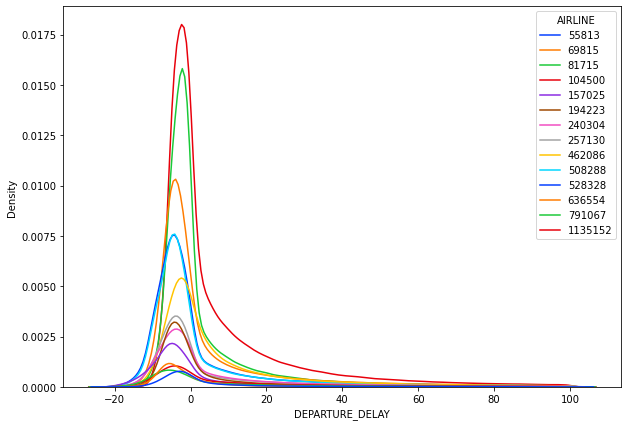

In [46]:
plt.figure(figsize=(10,7))
sns.kdeplot((flights[(flights.DEPARTURE_DELAY >= -20) & (flights.DEPARTURE_DELAY <= 100)].DEPARTURE_DELAY), 
           hue=flights.AIRLINE, palette='bright')

<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='Count'>

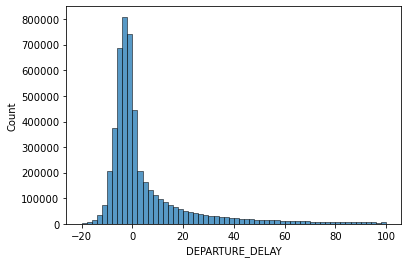

In [47]:
sns.histplot((flights[(flights.DEPARTURE_DELAY >= -20) & (flights.DEPARTURE_DELAY <= 100)].DEPARTURE_DELAY), bins=60)

<AxesSubplot:xlabel='SCHEDULED_TIME', ylabel='Density'>

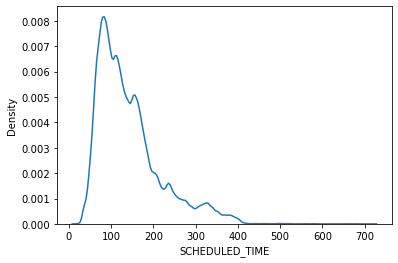

In [48]:
sns.kdeplot(flights.SCHEDULED_TIME)

<AxesSubplot:xlabel='SCHEDULED_TIME', ylabel='Count'>

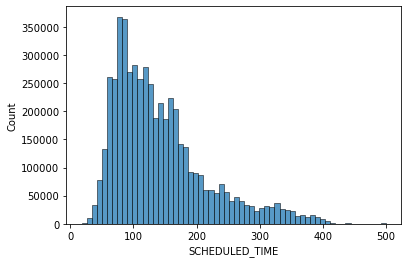

In [49]:
sns.histplot(flights[(flights.SCHEDULED_TIME <= 500)].SCHEDULED_TIME, bins=60)

## Анализ результатов

Блиц-тест алгоритмов на разделении данных показал, что метод опорных векторов значительно лучше справляется с задачей прогнозирования DEPARTURE_DELAY, однако результат лишь немного отличается от базового решения (14 минут против 18 по метрике MAE). На втором месте оказался XGBoost. Линейная регрессия и нейросеть показали худшие результаты.

Главный вывод - для хорошего прогнозирования целевой переменной не хватает значимых признаков. В данном исследовании мы опирались на знания о месяце, дне, дне недели, авиакомпании, аэропортах прибытия и назначения, а также о расстоянии перелёта и запланированном времени отправления. Скорее всего, эти факторы не оказывают существенного влияния на задержку вылета. Замечу, что для некоторых авиакомпаний MAE составила порядка 10 минут, а для кого-то - 20. Это наталкивает на мысль, что некоторые авиакомпании более компетентны или некоторые неизвестные факторы (например, погода) не оказывают сильного влияния на DEPARTURE_DELAY для конкретный авиалиний.

Также есть предположение о том, что наличие выбросов сильно мешает обучению моделей. Нужно постараться понять причины аномально долгих задержек и отсеять их на обучении.